#### Based on these excellent guides:
https://www.kaggle.com/moghazy/beginner-s-guide-to-cnns-with-keras-99-8

https://cv-tricks.com/tensorflow-tutorial/keras/

In [1]:
import keras
import tensorflow as tf
import numpy as np
import os
import pandas as pd

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
from keras import backend as K
from keras.utils import np_utils

In [4]:
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [5]:
from keras.models import Sequential
import pandas as pd

model = Sequential()

In [6]:
K.set_image_data_format('channels_last')
np.random.seed(0)

In [8]:
# data normalzation
X_train = X_train / 255
X_test2 = X_test / 255

In [9]:
import matplotlib.pyplot as plt

print("the number of training examples = %i" % X_train.shape[0])
print("the number of classes = %i" % len(np.unique(y_train)))
print("Dimention of images = {:d} x {:d}  ".format(X_train[1].shape[0],X_train[1].shape[1])  )

the number of training examples = 60000
the number of classes = 10
Dimention of images = 28 x 28  


In [10]:
unique, count= np.unique(y_train, return_counts=True)

In [ ]:
## trying out enumerate function
# a = [5, 6, 7, 8]
# enumerate(a)
# for i in enumerate(a):
#     print(i)

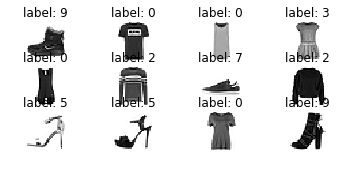

In [11]:
images_and_labels = list(zip(X_train,  y_train))
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(5, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('label: %i' % label)


In [ ]:
# how plt.subplots work
# plt.subplot(3, 4, 1)
# plt.subplot(3, 4, 2)
# plt.subplot(3, 4, 3)
# plt.subplot(3, 4, 4)
# plt.subplot(3, 4, 5)

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
from keras.layers import Dropout

model.add(Conv2D(40, kernel_size=5, padding="same",input_shape=(28, 28, 1), activation = 'relu'))
model.add(Conv2D(50, kernel_size=5, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

In [15]:
model.add(Conv2D(70, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(100, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [16]:
from keras.layers.core import Activation

model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs= 32 , batch_size=200, validation_split = 0.2)
scores = model.evaluate(X_test, y_test, verbose = 10 )
print ( scores )

Train on 48000 samples, validate on 12000 samples
Epoch 1/32
48000/48000 [==============================] - 287s 6ms/step - loss: 0.7794 - acc: 0.7191 - val_loss: 0.4536 - val_acc: 0.8319
Epoch 2/32
48000/48000 [==============================] - 314s 7ms/step - loss: 0.4366 - acc: 0.8409 - val_loss: 0.3662 - val_acc: 0.8642
Epoch 3/32
48000/48000 [==============================] - 323s 7ms/step - loss: 0.3610 - acc: 0.8694 - val_loss: 0.3270 - val_acc: 0.8834
Epoch 4/32
48000/48000 [==============================] - 291s 6ms/step - loss: 0.3197 - acc: 0.8824 - val_loss: 0.3256 - val_acc: 0.8768
Epoch 5/32
48000/48000 [==============================] - 291s 6ms/step - loss: 0.2941 - acc: 0.8923 - val_loss: 0.2995 - val_acc: 0.8892
Epoch 6/32
48000/48000 [==============================] - 294s 6ms/step - loss: 0.2702 - acc: 0.9018 - val_loss: 0.2629 - val_acc: 0.9070
Epoch 7/32
48000/48000 [==============================] - 290s 6ms/step - loss: 0.2553 - acc: 0.9070 - val_loss: 0.2499 - 

In [18]:
scores = model.evaluate(X_test, y_test, verbose = 10 )
print ( scores )

[2.5598183097839358, 0.8385]
